In [1]:
import pandas as pd 
import matplotlib.pylab as plt 
import numpy as np 
%matplotlib inline

In [2]:
data = pd.read_csv('./pima-data.csv')
data.head(15)  

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [4]:
data['diabetes'].value_counts()

False    500
True     268
Name: diabetes, dtype: int64

In [5]:
diabetes_map = {True : 1 , False : 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [6]:
data.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000


In [7]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


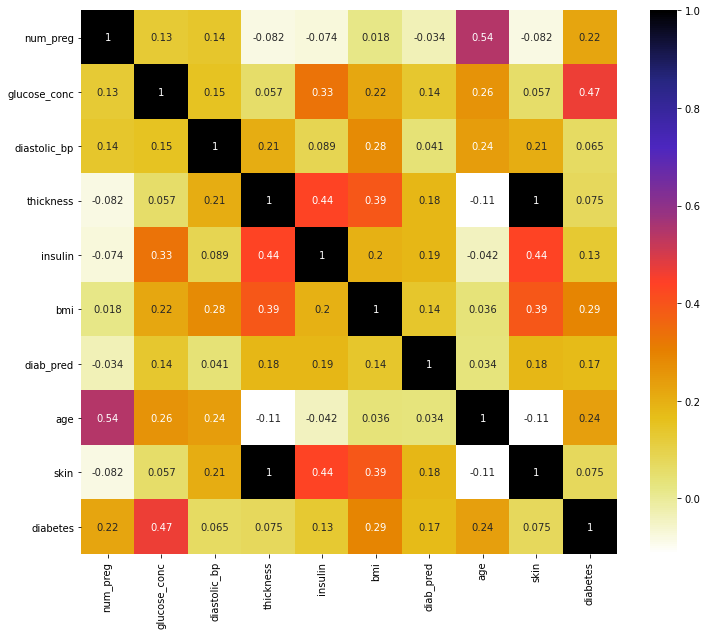

In [8]:
import seaborn as sns
plt.figure(figsize = (12,10))
cor = data.corr()
sns.heatmap(cor , annot = True , cmap = plt.cm.CMRmap_r)
plt.show()

In [9]:
data.corr()['diab_pred'].sort_values(ascending = False) 

diab_pred       1.000000
insulin         0.185071
skin            0.183928
thickness       0.183928
diabetes        0.173844
bmi             0.140647
glucose_conc    0.137337
diastolic_bp    0.041265
age             0.033561
num_preg       -0.033523
Name: diab_pred, dtype: float64

In [10]:
def correlation(dataset , threshold):
    col = set()
    matrix = dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if matrix.iloc[i , j] > threshold:
                col_name = matrix.columns[i]
                col.add(col_name)
    return col_name
x =  correlation(data , .8)
print(x)

skin


In [11]:
from sklearn.model_selection import train_test_split
feature_columns = [ 'glucose_conc',	'diastolic_bp',	'thickness', 'insulin',	'bmi', 'age']
predicted_class = ['diabetes']

In [12]:
x = data[feature_columns].values
y = data[predicted_class].values

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 10)

In [13]:
data[feature_columns].describe()

,glucose_conc,diastolic_bp,thickness,insulin,bmi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000


In [14]:
print(f"Total No of rows : {len(data)}")
print(f"No of Zeros in num_preg : {len(data.loc[data['num_preg'] == 0])}")
print(f"No of Zeros in glucose_conc : {len(data.loc[data['glucose_conc'] == 0])}")
print(f"No of Zeros in diastolic_bp : {len(data.loc[data['diastolic_bp'] == 0])}")
print(f"No of Zeros in thickness : {len(data.loc[data['thickness'] == 0])}")
print(f"No of Zeros in insulin : {len(data.loc[data['insulin'] == 0])}")
print(f"No of Zeros in bmi : {len(data.loc[data['bmi'] == 0])}")
print(f"No of Zeros in diab_pred : {len(data.loc[data['diab_pred'] == 0])}")

Total No of rows : 768
No of Zeros in num_preg : 111
No of Zeros in glucose_conc : 5
No of Zeros in diastolic_bp : 35
No of Zeros in thickness : 227
No of Zeros in insulin : 374
No of Zeros in bmi : 11
No of Zeros in diab_pred : 0


In [15]:
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer


In [16]:
# my_pipeline = Pipeline([
#     ('imputer', SimpleImputer(missing_values=0 , strategy="mean")),
#     (('scaler', StandardScaler()))
# ])
# X_train = my_pipeline.fit_transform(X_train)
# # X_test = my_pipeline.fit_transform(X_test)

In [17]:
RFC_model = Pipeline([
    ('imputer', SimpleImputer(missing_values=0 , strategy="mean")),
    (('scaler', StandardScaler())),
    ('RFC' ,RandomForestClassifier(random_state=10))
])

RFC_model.fit(X_train, y_train)
predict_test_data = RFC_model.predict(X_test)
print(f"Random Forest Classifier : {accuracy_score(y_test , predict_test_data)}")

Random Forest Classifier : 0.7316017316017316


In [18]:
DTC_model = Pipeline([
    ('imputer', SimpleImputer(missing_values=0 , strategy="mean")),
    (('scaler', StandardScaler())),
    ('DTC' ,DecisionTreeClassifier(random_state=10))
])

DTC_model.fit(X_train, y_train)
predict_test_data = DTC_model.predict(X_test)
print(f"Decision Tree Classifier : {accuracy_score(y_test , predict_test_data)}")

Decision Tree Classifier : 0.683982683982684


In [19]:
ABC_model = Pipeline([
    ('imputer', SimpleImputer(missing_values=0 , strategy="mean")),
    (('scaler', StandardScaler())),
    ('ABC' ,AdaBoostClassifier(random_state=10))
])

ABC_model.fit(X_train, y_train)
predict_test_data = ABC_model.predict(X_test)
print(f"AdaBoost Classifier : {accuracy_score(y_test , predict_test_data)}")

AdaBoost Classifier : 0.7445887445887446


In [25]:
 
x = ABC_model.predict([[89,  90,  30,   0,  33.5, 42 ]])
print(x) 

[0]


In [ ]:
# from joblib import dump, load 
# dump(model,'DIABETESPRED.joblib') 

In [23]:
from joblib import dump, load 
dump(ABC_model,'Updated_DIABETESPRED.joblib') 

['Updated_DIABETESPRED.joblib']

In [26]:
model = load('Updated_DIABETESPRED.joblib')

In [27]:
model.predict([[89,  90,  30,   0,  33.5, 42 ]])

array([0], dtype=int64)

# XGBoost

In [110]:
import xgboost as xgb 
from sklearn.model_selection import RandomizedSearchCV

In [111]:
classifier = xgb.XGBClassifier(seed = 82)

In [112]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [113]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [114]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [115]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train , y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.

 Time taken: 0 hours 0 minutes and 4.12 seconds.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    3.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.0s finished


In [116]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=82,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=82,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [117]:
classifier=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [118]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train , y_train.ravel(),cv=10)
 

[21:50:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:50:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:50:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [119]:
score

array([0.75925926, 0.81481481, 0.75925926, 0.68518519, 0.7037037 ,
       0.72222222, 0.83333333, 0.71698113, 0.71698113, 0.73584906])

In [83]:
score.mean()

0.7447589098532494

In [121]:
# feature_columns = [ 'glucose_conc',	'diastolic_bp',	'thickness', 'insulin',	'bmi', 'age',	'skin']
# predicted_class = ['diab_pred']

# x = data[feature_columns].values
# y = data[predicted_class].values

# X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 10)

In [27]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# my_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy="mean"))
#     #     ..... add as many as you want in your pipeline
#     # ('std_scaler', StandardScaler()),
# ])

In [124]:
# X_train = my_pipeline.fit_transform(X_train)
# X_test = my_pipeline.fit_transform(X_test)


In [125]:
# model = RandomForestClassifier(random_state=10)
# model = RandomForestRegressor()
# model = LinearRegression()
# model = DecisionTreeRegressor( )
# model.fit(X_train , y_train.ravel())

DecisionTreeRegressor()

In [116]:
# from sklearn.metrics import accuracy_score
# predict_test_data = model.predict(X_test)
# print(predict_test_data)
# print(y_test.ravel())
# # print(accuracy_score(y_test.ravel() , predict_test_data))

In [127]:
# from sklearn.metrics import mean_squared_error
# predict_test_data = model.predict(X_test)
# mse = mean_squared_error(y_test.ravel(), predict_test_data)
# rmse = np.sqrt(mse)
# print(rmse)

0.4108714052940551
